In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


Ex_1

In [5]:
x_data = np.random.rand(100)
y_data = x_data*0.1+0.2

b = tf.Variable(0.)
k = tf.Variable(0.)
y =k*x_data+b

loss = tf.reduce_mean(tf.square(y-y_data))
optimizer = tf.train.GradientDescentOptimizer(0.2)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for step in range(200):
        sess.run(train)
        if step%20 == 0:
            print(step,sess.run([k,b]))

0 [0.049945384, 0.09888226]
20 [0.10048946, 0.19975248]
40 [0.100286804, 0.19985506]
60 [0.10016803, 0.19991508]
80 [0.100098446, 0.19995025]
100 [0.100057684, 0.19997084]
120 [0.1000338, 0.19998293]
140 [0.1000198, 0.19998999]
160 [0.10001161, 0.19999413]
180 [0.1000068, 0.19999656]


Ex_2

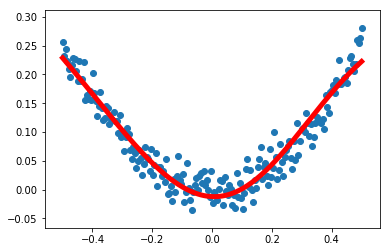

In [6]:
x_data = np.linspace(-0.5,0.5,200)[:,np.newaxis]
noise = np.random.normal(0,0.02,x_data.shape)
y_data = np.square(x_data)+noise

x = tf.placeholder(tf.float32,[None,1])
y = tf.placeholder(tf.float32,[None,1])

weights_L1 = tf.Variable(tf.random_normal([1,10]))
biases_L1 = tf.Variable(tf.zeros([1,10]))
Wx_plus_b_L1 = tf.matmul(x,weights_L1)+biases_L1
L1 = tf.nn.tanh(Wx_plus_b_L1)

weights_L2 = tf.Variable(tf.random_normal([10,1]))
biases_L2 = tf.Variable(tf.zeros([1,1]))
Wx_plus_b_L2 = tf.matmul(L1,weights_L2)+biases_L2
prediction = tf.nn.tanh(Wx_plus_b_L2)

loss = tf.reduce_mean(tf.square(y - prediction))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
with tf.Session()as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(2000):
        sess.run(train_step,feed_dict = {x:x_data,y:y_data})
    prediction_value = sess.run(prediction,feed_dict = {x: x_data})
    
    plt.figure()
    plt.scatter(x_data,y_data)
    plt.plot(x_data,prediction_value,'r-',lw = 5)
    plt.show